# From explore_tlm.Rmd

Reading layer `Rim_fire' from data source 
  `/home/jovyan/data-store/hackathon2023_F/Data/Rim_fire.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 22 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -120.2537 ymin: 37.75089 xmax: -119.6844 ymax: 38.08098
Geodetic CRS:  NAD83


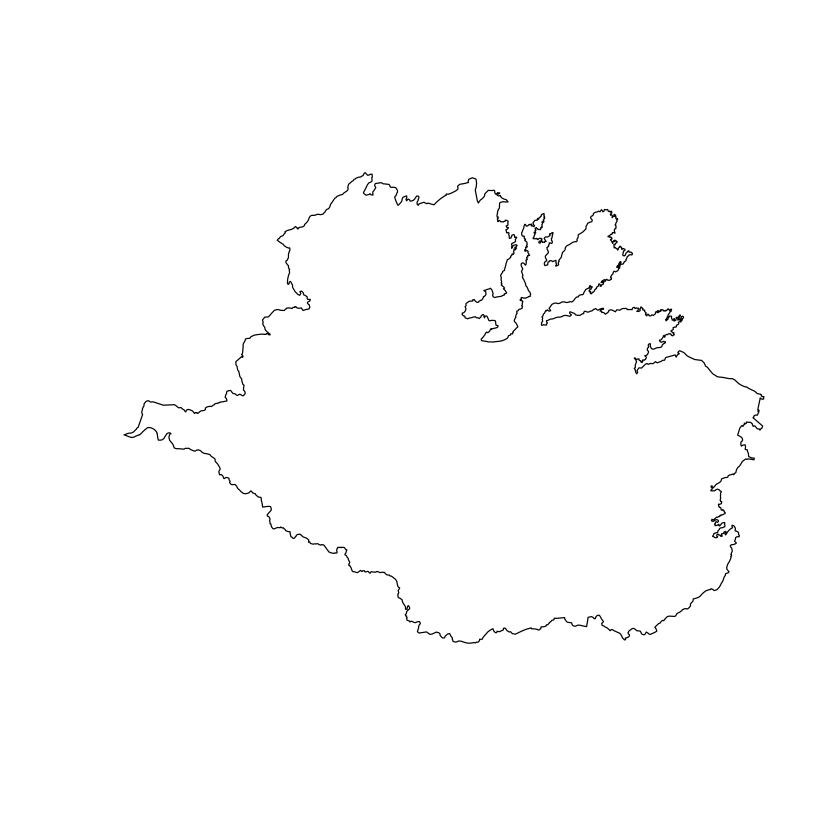

In [3]:
library(sf)
library(tidyverse)

rimFire <- sf::st_read("Data/Rim_fire.shp")


#crs(rimFire)
plot(rimFire$geometry)

# From SpatialIntersection_FireAndOccurrence.R
modified by uploading sample manzanita data to github

In [5]:

library(tidyverse)
library(sf)

# Specify the path to the folder containing your XML files
setwd("/home/jovyan/data-store/hackathon2023_F")

fire_path <- "Data/Rim_fire.shp"
folder_path <- "bill_c_tinkering/occurrence.txt" # This is 9 gb, so difficult to maneuver 

df <- read.table(folder_path, header = TRUE, sep = "\t", fill = TRUE)
fire <- st_read(fire_path)

# Clean occurrence data 
df_new <- df %>% 
  select(scientificName, 
         organismQuantity, 
         decimalLatitude, 
         decimalLongitude, 
         year, 
         month, 
         day, 
         kingdom) %>% 
  mutate(decimalLatitude = as.numeric(decimalLatitude), 
         decimalLongitude = as.numeric(decimalLongitude)) %>% 
  filter(!is.na(decimalLatitude) & !is.na(decimalLongitude)) %>% 
  filter(decimalLatitude > 20, 
         decimalLatitude < 40, 
         decimalLongitude > -125, 
         decimalLongitude < -115)


Reading layer `Rim_fire' from data source 
  `/home/jovyan/data-store/hackathon2023_F/Data/Rim_fire.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 22 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -120.2537 ymin: 37.75089 xmax: -119.6844 ymax: 38.08098
Geodetic CRS:  NAD83


Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”




Exploring further... Nov 16, 2023 ... 12:15pm EST ... downloading GBIG data related to manzanita occurances in location near rim fire.  Citation: *GBIF.org (16 November 2023) GBIF Occurrence Download  https://doi.org/10.15468/dl.jg4thn*

[1] 0.0764

1039780438 [m^2]

1039.78 [m^2]

401.3552 [m^2]

ERROR: Error in t_area(fire$geometry): could not find function "t_area"


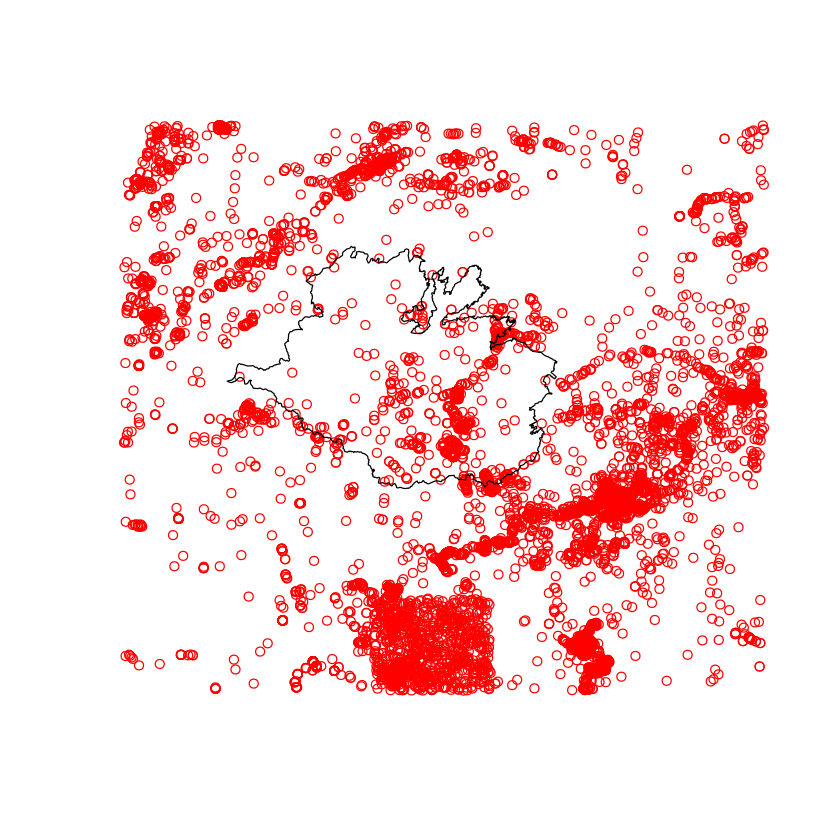

In [6]:
# Take a sample to reduce processing time 
df_sample <- df_new[sample(1:length(df_new$scientificName), size = 10000, replace = FALSE),]

# Convert to spatial 
df_sf <- st_as_sf(df_sample, coords = c("decimalLongitude", "decimalLatitude"), crs = 4326) %>% st_transform(4269)

# Run spatial intersection (boolean column) 
df_sf$fire <- ifelse(st_intersects(df_sf, fire), 1, 0)

# Percent of sample data inside fire boundary 
sum(df_sf$fire, na.rm=TRUE)/length(df_sf$fire)

# Plot results 
plot(df_sf$geometry, col="red")
plot(fire$geometry, add=TRUE)

# Calculating area of fire polygon (Sanity check) 
st_area(fire$geometry) # square meters
st_area(fire$geometry)/1000000 # square km
st_area(fire$geometry)/1000000 * 0.386 # square miles
t_area(fire$geometry)/1000000 * 0.386 * 640 #acres 
